In [20]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error,r2_score , root_mean_squared_error
from sklearn.datasets import  fetch_california_housing
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()
df = pd.DataFrame(housing.data , columns = housing.feature_names)
df['Price'] = housing.target

In [18]:
print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  Price  
0        -122

In [14]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [15]:
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

traing:16,512| testing: 4128
 
[5] Training 6 models
--------------------------------------------------------------------------------
Grading Boosting     | Accuracy : 79.00% |R2 :0.7900 | RMSE :0.5246
            model  R2 score  Accuracy     RMSE      MAE
 Grading Boosting  0.790025 79.002485 0.524551 0.355312
    Decision Tree  0.683269 68.326870 0.644242 0.433044
    Random Forest  0.646852 64.685162 0.680271 0.490313
 Ridge Regression  0.575791 57.579052 0.745579 0.533199
Linear Regression  0.575788 57.578771 0.745581 0.533200
 Lasso Regression  0.481361 48.136113 0.824396 0.622201
training best model

 Performances metrices :
Accuracy :83.41%
R2 score :0.8341
RMSE:0.4663
MAE:0.3093


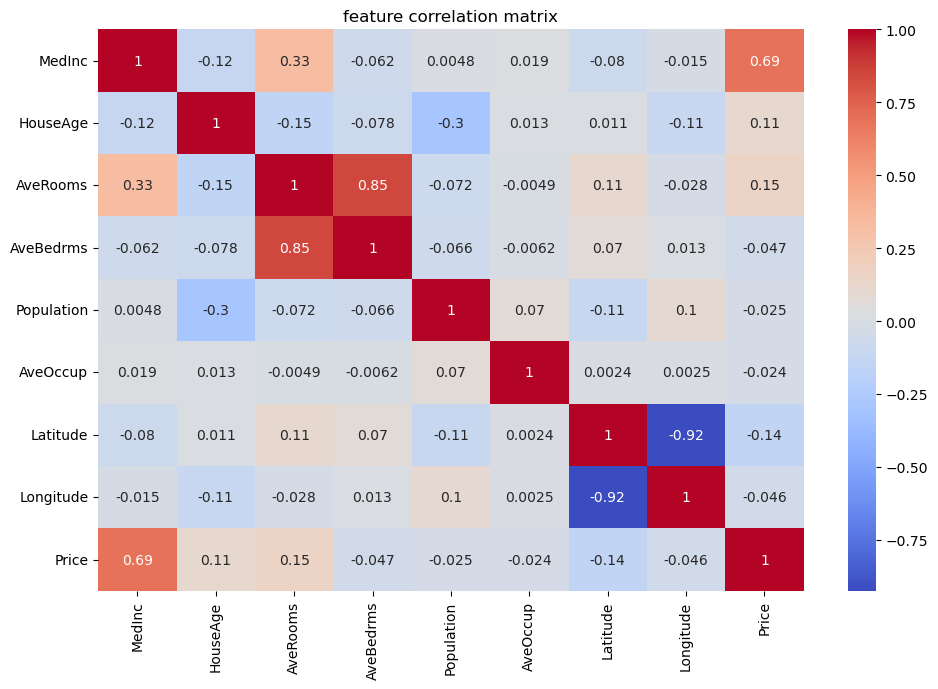

correlation heatmap


C:\Users\HP\AppData\Local\Temp\ipykernel_18208\3066557448.py:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


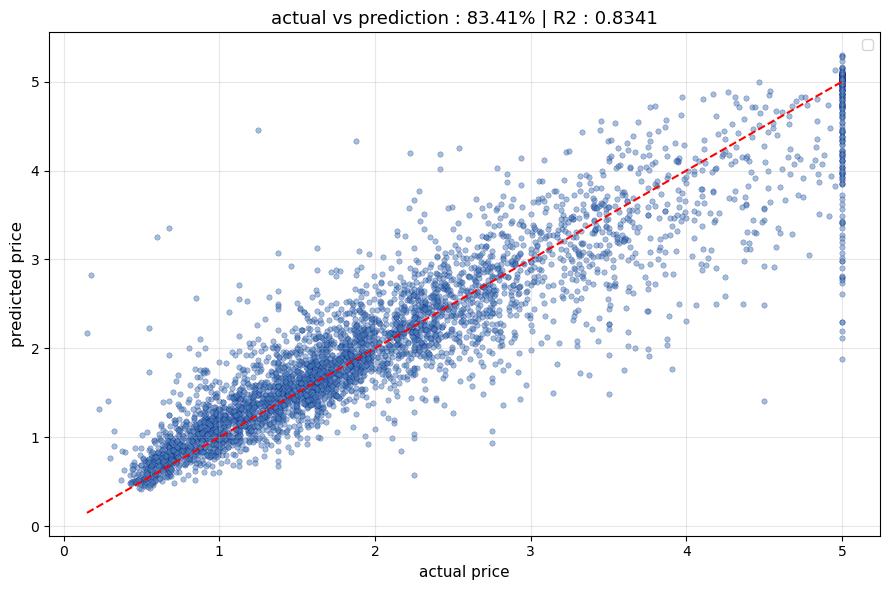

In [49]:
x = df.drop('Price', axis = 1)
y = df['Price']
x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size =0.2 , random_state = 42)
print(f"traing:{len(x_train):,}| testing: {len(x_test)}")
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(" \n[5] Training 6 models")
print("-"*80)
models = {
    'Linear Regression' : LinearRegression(),
    'Ridge Regression' : Ridge(alpha = 0.1),
    'Lasso Regression' : Lasso(alpha =0.1),
    'Decision Tree': DecisionTreeRegressor(random_state = 42 , max_depth =10),
    'Random Forest' :RandomForestRegressor(n_estimators = 50 , random_state = 42 , max_depth = 5),
    'Grading Boosting': GradientBoostingRegressor(n_estimators = 50 , random_state = 42 , max_depth = 5)
}
results =[]   
for name , model in models.items():
    if ['Linear Regression ','Ridge Regression','Lasso Regression']:
        model.fit(x_train_scaled , y_train)
        y_pred = model.predict(x_test_scaled)
    else:
        model.fit(x_train , y_train)
        y_pred = model.predict(x_test)
    r2 = r2_score( y_test , y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test , y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    accuracy = r2*100
    results.append({
        'model':name,
        'R2 score':r2 ,
        'Accuracy':accuracy,
        'RMSE': rmse,
        'MAE':mae
     })
print(f"{name:20s} | Accuracy : {accuracy:.2f}% |R2 :{r2:.4f} | RMSE :{rmse:.4f}")
results_df = pd.DataFrame(results).sort_values('Accuracy' , ascending = False)
print(results_df.to_string(index = False))
best_model_name = results_df.iloc[0]['model']
best_accuracy = results_df.iloc[0]['Accuracy']
best_r2 = results_df.iloc[0]['R2 score']
print("training best model")
if 'Random Forest' in best_model_name:
    final_model = RandomForestRegressor(n_estimators = 100 , random_state = 42 , max_depth = 20, min_samples_split =2 , n_jobs=-1)
else:
    final_model = GradientBoostingRegressor(n_estimators = 100 , random_state = 42 , max_depth = 7, learning_rate = 0.1)
final_model.fit(x_train , y_train)
y_pred_final = final_model.predict(x_test)
 
final_r2 = r2_score(y_test , y_pred_final)
final_rmse = np.sqrt(mean_squared_error(y_test , y_pred_final))
final_mae = mean_absolute_error( y_test , y_pred_final)
final_accuracy = final_r2*100
print(f"\n Performances metrices :")
print(f"Accuracy :{final_accuracy:.2f}%")
print(f"R2 score :{ final_r2:.4f}")
print(f"RMSE:{ final_rmse:.4f}")
print(f"MAE:{final_mae:.4f}")
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True , cmap = "coolwarm")
plt.title("feature correlation matrix")
plt.tight_layout()
plt.show()
print("correlation heatmap")
plt.figure(figsize=(9,6))
plt.scatter(y_test , y_pred_final , alpha =0.5 , s = 15 , color = "steelblue", edgecolor ="navy", linewidth = 0.3)
plt.plot([y_test.min() , y_test.max()], [ y_test.min() , y_test.max()],'r--')
plt.xlabel("actual price" , fontsize = 11 )
plt.ylabel("predicted price" , fontsize = 12)
plt.title(f'actual vs prediction : {final_accuracy:.2f}% | R2 : {final_r2:.4f}', fontsize = 13)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

                     
    

    


